In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score 
from collections import Counter
from collections import defaultdict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# datasets
X_train = pd.read_csv('.\data\csv_data\X_train.csv')
X_test = pd.read_csv('.\data\csv_data\X_test.csv')
y_train = pd.read_csv('.\data\csv_data\y_train.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')
X_train_151var = pd.read_csv('.\data\csv_data\TRAINING_SET_DM2.csv')

In [3]:
X_train.shape

(7352, 561)

In [4]:
# Target variable from integer to categorical
y_train['Label'] = pd.Categorical(y_train["Label"])
y_test['Label'] = pd.Categorical(y_test["Label"])

# 1. Decision Tree Classifier

>class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

### 1.1 DecisionTree su X_train (training set originale)

In [5]:
# DT senza parameter tuning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



#### Parameter tuning

In [7]:
# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {'max_depth': [5, 10, 15],
             'min_samples_split': [5, 10, 20],
             'min_samples_leaf': [1, 5]
             }


grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train, y_train)

# results of the grid search
res = grid_search.cv_results_

In [8]:
# funzione del tutor per printare i risultati
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [38]:
# best 3 parameter combinations
report(res, n_top=25)

Model with rank: 1
Mean validation score: 0.942 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.941 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.941 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.941 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.941 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 10}

Model with rank: 6
Mean validation score: 0.940 (std: 0.004)
Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}

Model with rank: 7
Mean validation score: 0.940 (std: 0.003)
Parameters: {'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 2}

Model with rank: 7
Mean va

In [22]:
# DT con parameter tuning (Model with rank: 1)
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print('Accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

 
 
              precision    recall  f1-score   support

           1       0.83      0.95      0.89       496
           2       0.87      0.78      0.82       471
           3       0.89      0.84      0.86       420
           4       0.87      0.76      0.81       491
           5       0.80      0.89      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.87      0.87      2947
weighted avg       0.88      0.88      0.87      2947



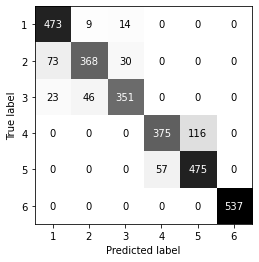

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Greys', colorbar=False)

In [24]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

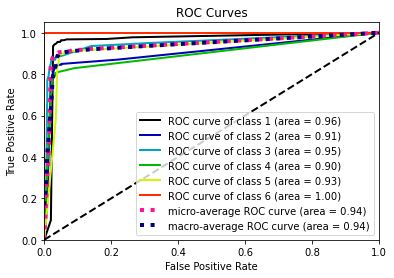

In [25]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

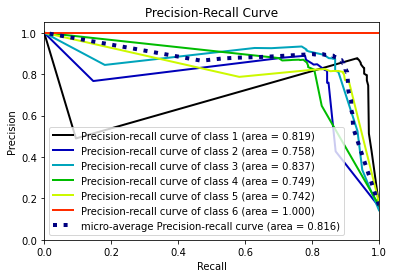

In [26]:
plot_precision_recall(y_test, y_score)
plt.show()

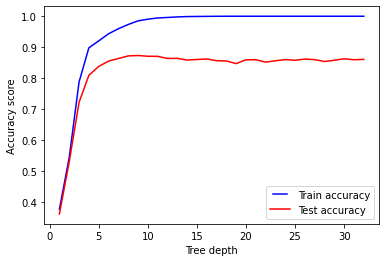

In [56]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred)
    # Add auc score to previous train results
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    # Add auc score to previous test results
    test_results.append(accuracy_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree max depth')
plt.show()

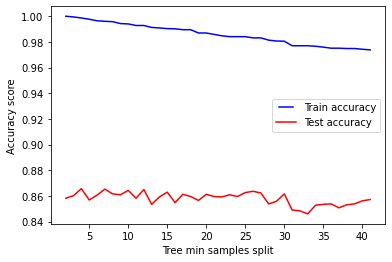

In [73]:
min_samples = np.linspace(2, 41, 40, endpoint=True, dtype=int)
train_results = []
test_results = []
for min_samples_split in min_samples:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred)
    # Add auc score to previous train results
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    # Add auc score to previous test results
    test_results.append(accuracy_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label='Train accuracy')
line2, = plt.plot(min_samples, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree min samples split')
plt.show()


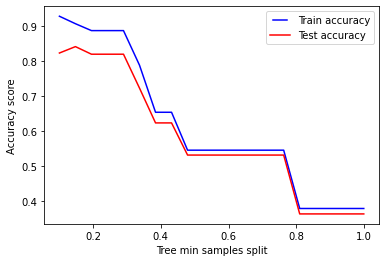

In [74]:
min_samples = np.linspace(0.1, 1.0, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred)
    # Add auc score to previous train results
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    # Add auc score to previous test results
    test_results.append(accuracy_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label='Train accuracy')
line2, = plt.plot(min_samples, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree min samples split')
plt.show()

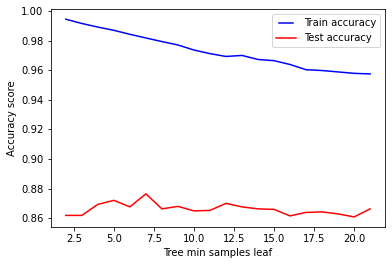

In [88]:
min_samples = np.linspace(2, 21, 20, endpoint=True, dtype=int)
train_results = []
test_results = []
for min_samples_split in min_samples:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred)
    # Add auc score to previous train results
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    # Add auc score to previous test results
    test_results.append(accuracy_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label='Train accuracy')
line2, = plt.plot(min_samples, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree min samples leaf')
plt.show()


### 1.2 DecisionTree su X_train (training set originale) con PCA

In [12]:
# standardization di X_train
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
# proiezione standardizzazione su X_test
scaled_X_test = scaler.transform(X_test)

In [14]:
# riduzione dimensionalità a 26 PC
pca = PCA(n_components=26)
pca.fit(scaled_X_train)
X_train_pca = pca.transform(scaled_X_train)

In [15]:
# percentage of variance explained by the first 26 components
print(sum(pca.explained_variance_ratio_))

0.8017810240386228


In [16]:
# proiezione delle stesse 26 componenti su X_test 
X_test_pca = pca.transform(scaled_X_test)

In [17]:
# DT senza parameter tuning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.83      0.78       496
           2       0.78      0.74      0.76       471
           3       0.72      0.65      0.68       420
           4       0.65      0.65      0.65       491
           5       0.70      0.74      0.72       532
           6       0.97      0.91      0.94       537

    accuracy                           0.76      2947
   macro avg       0.76      0.75      0.76      2947
weighted avg       0.76      0.76      0.76      2947



#### Parameter tuning

In [18]:
# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {'max_depth': [4, 10, 15, 20],
             'min_samples_split': [2, 5, 10, 20],
             'min_samples_leaf': [1, 5, 10, 20]
             }


grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf ,scoring='f1')
grid_search.fit(X_train_pca, y_train)

# results of the grid search
res = grid_search.cv_results_

In [19]:
# grid search best 3 results
report(res, n_top=3)

Model with rank: 1
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}



In [20]:
# DT con parameter tuning (Model with rank: 1)
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.94      0.76       496
           2       0.88      0.76      0.81       471
           3       0.80      0.47      0.59       420
           4       0.61      0.58      0.60       491
           5       0.68      0.78      0.72       532
           6       0.97      0.87      0.92       537

    accuracy                           0.74      2947
   macro avg       0.76      0.73      0.73      2947
weighted avg       0.76      0.74      0.74      2947



In [21]:
# DT con parameter tuning (Model with rank: 2)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=10, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.81      0.77       496
           2       0.77      0.76      0.76       471
           3       0.70      0.64      0.67       420
           4       0.63      0.66      0.65       491
           5       0.71      0.73      0.72       532
           6       0.97      0.90      0.94       537

    accuracy                           0.75      2947
   macro avg       0.75      0.75      0.75      2947
weighted avg       0.76      0.75      0.76      2947



In [22]:
# DT con parameter tuning (Model with rank: 3)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=20, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.83      0.76       496
           2       0.76      0.73      0.75       471
           3       0.72      0.59      0.65       420
           4       0.64      0.69      0.66       491
           5       0.73      0.73      0.73       532
           6       0.97      0.90      0.93       537

    accuracy                           0.75      2947
   macro avg       0.75      0.75      0.75      2947
weighted avg       0.76      0.75      0.75      2947



### 1.3 DecisionTree su X_train_151var (training set senza variabili correlate)

In [23]:
# proiettare le variabili scelte su X_test
X_test_151var = pd.read_csv('.\data\csv_data\TEST_SET_DM2.csv')

In [24]:
# DT senza parameter tuning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_151var, y_train)

y_pred = clf.predict(X_test_151var)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.89      0.84       496
           2       0.82      0.76      0.79       471
           3       0.80      0.75      0.77       420
           4       0.80      0.76      0.78       491
           5       0.79      0.83      0.81       532
           6       1.00      1.00      1.00       537

    accuracy                           0.84      2947
   macro avg       0.83      0.83      0.83      2947
weighted avg       0.84      0.84      0.84      2947



#### Parameter tuning

In [25]:
# grid search con stessi parametri di prima tra cui scegliere 
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf ,scoring='f1')
grid_search.fit(X_train_151var, y_train)

# results of the grid search
res = grid_search.cv_results_

In [26]:
# grid search best 3 results
report(res, n_top=3)

Model with rank: 1
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}



In [28]:
# DT con parameter tuning (Model with rank: 1)
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf.fit(X_train_151var, y_train)

y_pred = clf.predict(X_test_151var)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.80      0.73       496
           2       0.90      0.62      0.74       471
           3       0.68      0.76      0.72       420
           4       0.79      0.81      0.80       491
           5       0.82      0.80      0.81       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2947
   macro avg       0.81      0.80      0.80      2947
weighted avg       0.82      0.80      0.80      2947



In [29]:
# DT con parameter tuning (Model with rank: 2)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=10, random_state=42)
clf.fit(X_train_151var, y_train)

y_pred = clf.predict(X_test_151var)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85       496
           2       0.80      0.76      0.78       471
           3       0.78      0.75      0.76       420
           4       0.82      0.74      0.78       491
           5       0.79      0.86      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.84      2947
   macro avg       0.83      0.83      0.83      2947
weighted avg       0.84      0.84      0.84      2947



In [30]:
# DT con parameter tuning (Model with rank: 3)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=20, random_state=42)
clf.fit(X_train_151var, y_train)

y_pred = clf.predict(X_test_151var)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85       496
           2       0.78      0.73      0.75       471
           3       0.80      0.73      0.76       420
           4       0.83      0.73      0.77       491
           5       0.78      0.87      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.83      2947
   macro avg       0.83      0.83      0.83      2947
weighted avg       0.83      0.83      0.83      2947



### 1.4 DecisionTree su X_train_151var (training set senza variabili correlate) con PCA

In [31]:
# standardization di X_train
scaler = StandardScaler()
scaled_X_train_151var = scaler.fit_transform(X_train_151var)

In [32]:
# proiezione standardizzazione su X_test_151var
scaled_X_test_151var = scaler.transform(X_test_151var)

In [33]:
# riduzione dimensionalità a 51 PC
pca = PCA(n_components=51)
pca.fit(scaled_X_train_151var)
X_train_151var_pca = pca.transform(scaled_X_train_151var)

In [34]:
# percentage of variance explained by the first 51 components
print(sum(pca.explained_variance_ratio_))

0.8011650289350646


In [35]:
# proiezione delle stesse 51 componenti su X_test_151var 
X_test_151var_pca = pca.transform(scaled_X_test_151var)

In [36]:
# DT senza parameter tuning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.80      0.73       496
           2       0.77      0.62      0.69       471
           3       0.66      0.64      0.65       420
           4       0.54      0.60      0.57       491
           5       0.68      0.70      0.69       532
           6       0.83      0.74      0.78       537

    accuracy                           0.69      2947
   macro avg       0.69      0.68      0.69      2947
weighted avg       0.69      0.69      0.69      2947



#### Parameter tuning

In [37]:
# grid search con stessi parametri di prima tra cui scegliere 
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf ,scoring='f1')
grid_search.fit(X_train_151var_pca, y_train)

# results of the grid search
res = grid_search.cv_results_

In [38]:
# grid search best 3 results
report(res, n_top=3)

Model with rank: 1
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}



In [39]:
# DT con parameter tuning (Model with rank: 1)
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.84      0.74       496
           2       0.89      0.70      0.79       471
           3       0.74      0.65      0.69       420
           4       0.47      0.47      0.47       491
           5       0.61      0.60      0.60       532
           6       0.81      0.85      0.83       537

    accuracy                           0.69      2947
   macro avg       0.70      0.68      0.69      2947
weighted avg       0.69      0.69      0.69      2947



In [40]:
# DT con parameter tuning (Model with rank: 2)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=10, random_state=42)
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.80      0.73       496
           2       0.80      0.68      0.73       471
           3       0.69      0.65      0.67       420
           4       0.57      0.61      0.59       491
           5       0.68      0.72      0.70       532
           6       0.86      0.77      0.81       537

    accuracy                           0.71      2947
   macro avg       0.71      0.70      0.71      2947
weighted avg       0.71      0.71      0.71      2947



In [41]:
# DT con parameter tuning (Model with rank: 3)
clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=20, random_state=42)
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74       496
           2       0.79      0.70      0.74       471
           3       0.71      0.62      0.66       420
           4       0.55      0.57      0.56       491
           5       0.65      0.69      0.67       532
           6       0.86      0.80      0.83       537

    accuracy                           0.70      2947
   macro avg       0.71      0.70      0.70      2947
weighted avg       0.71      0.70      0.70      2947

